## ICS 438 Final Project:
**Jerome Gallego, Taylor Wong, Ujjwal Gautam**
*Due December 13, 2022*
---
> For this project we have decided to use a dataset made from yelp reviews
> In this dataset it provides the business_id, date of the review, review_id, stars, type, user_id, cool, useful, and funny.
> The focus of our project is to determine if the stars from a scale of 1 to 5, can reflect how genuine (positive, neutral, >and negative) a review is.
> Using the operation known as Sentiment Analysis, we can provide a detailed investigation.

In the **first part** of the project, our objective is to use Sentiment Analysis of the review and visualize the result to measure the analysis's accuracy by comparing the sentiment analysis score to the stars given by the user. We observed by analyzing the plot of our comparison that our Sentiment analysis accuracy was low as the model classified many reviews with 1-2 stars as a positive sentiment and many reviews with 4-5 stars as negative sentiment. 

In the **second part** part of the project, we use sentiment analysis of the user review to predict the ratings or stars they would give based on the review. We're using a train_test_split function provided by the scikit library to split the dataset into training and testing sets. We train our machine learning model with the training datasets and predict the result of the test dataset using the model.


**In the yelp dataset, we will only be analyzing the star ratings and the reviews itself. Everything else can be considered irrelevant. To do this we have cleaned the data with known functions and toolds from our available libraries**

### For this notebook please install these packages to ensure that the file is running correctly
`%pip install -U gensim`  
`%pip install nltk`

> The dataset we used in this project can be found [here](https://www.dropbox.com/s/wc6rzl1a2os721d/yelp.csv?dl=0)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Part 1: Using nltk's Sentiment Intensity Analyzer ###
Before we can do any kind of analysis we will need to load the dataset.
As instructed, we understand that loading a file into ram can seem inefficient, to overcome this obstacle we have decided to process the data in chunksizes of 50 to relieve stress while processing. In the cell below, we first ensured that our data is clean of stopwords and special characters. In the analyze function, it reads the file as a variable then concatenates the data into a dataframe which will be used in nltk's Sentiment Analyzer.

In [3]:
# We cant
# Function to clean the text string in our dataframe
stop_words = set(stopwords.words('english'))
def clean_data(data):
    x = data.lower()
    x = x.replace('\n','')
    table = str.maketrans(dict.fromkeys(string.punctuation)) 
    x = x.translate(table)
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    return x

#Function that takes a csv file for processing and cleaning
def analyze(inputfile):
    yelp_df = pd.DataFrame()
    with open(inputfile, "r+") as csv_file:
        print("1: Reading in the csv file with a chunksize of 50")
        tp = pd.read_csv(csv_file, iterator=True, chunksize=50)
        print("2: Now we wil concatenate the data to be stored on a dataframe")
        yelp_df = pd.concat(tp, ignore_index=True)
        #assigns the columns that have been collected when reading in the file
        columns = yelp_df.columns.values.tolist()
        print("3: Deleting any irrelevant columns for better processing")
        yelp_df.drop(labels=["business_id", "date", "type", "review_id", "user_id", "cool", "useful", "funny"], axis=1, inplace=True)
        print("4: Now using the function clean_data to clean our reviews to be proccessed in our sentiment analyzer")
        yelp_df["text"] = yelp_df["text"].apply(clean_data)
        print("5: Now printing our new clean data")
    return yelp_df

yelp_df = analyze('./data/yelp.csv')
yelp_df


1: Reading in the csv file with a chunksize of 50
2: Now we wil concatenate the data to be stored on a dataframe
3: Deleting any irrelevant columns for better processing
4: Now using the function clean_data to clean our reviews to be proccessed in our sentiment analyzer
5: Now printing our new clean data


,stars,text
0,5,wife took birthday breakfast excellent weathe...
1,5,idea people give bad reviews place goes show p...
2,4,love gyro plate rice good also dig candy selec...
3,5,rosie dakota love chaparral dog park convenien...
4,5,general manager scott petello good egg go deta...
...,...,...
9995,3,first visithad lunch today used groupon orde...
9996,4,called house deliciousnessi could go item item...
9997,4,recently visited olive ivy business last week ...
9998,2,nephew moved scottsdale recently bunch friends...


### Vader lexicon
Vader lexicon is a rule-based sentiment analysis tool specifically made for social media sentiment. For a more in-depth documentation please refer to their GitHub: https://github.com/cjhutto/vaderSentiment

### Why we chose vader lexicon
We understand that the data we want to analyze contain only reviews. However, we thought it was a great idea to use this because the model has been trained to how user on social media express their feelings. We decided to go with vader lexicon since the way vader lexicon was designed is meant for review analysis. On their GitHub page, examples of the training data used include 'The service here is extremely good', and 'The service here is good'. Both of these examples can be mistaken as the same thing. But, in the model it can tell how positive or negative a sentence is. 

In [4]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
for index, row in yelp_df['text'].items():
    if index%50 == 0:
        result = SentimentIntensityAnalyzer().polarity_scores(row)
    if result['neg'] > result['pos']:
        yelp_df.loc[index, "Sentiment"] = "negative"
    elif result['pos'] > result['neg']:
        yelp_df.loc[index, "Sentiment"] = "positive"
    else:
        yelp_df.loc[index, "Sentiment"] = "neutral"    
    yelp_df.loc[index, 'neg_score'] = result['neg']
    yelp_df.loc[index, 'neu_score'] = result['neu']
    yelp_df.loc[index, 'pos_score'] = result['pos']
    yelp_df.loc[index, 'compound_score'] = result['compound']
yelp_df

,stars,text,Sentiment,neg_score,neu_score,pos_score,compound_score
0,5,wife took birthday breakfast excellent weathe...,positive,0.025,0.545,0.431,0.9935
1,5,idea people give bad reviews place goes show p...,positive,0.025,0.545,0.431,0.9935
2,4,love gyro plate rice good also dig candy selec...,positive,0.025,0.545,0.431,0.9935
3,5,rosie dakota love chaparral dog park convenien...,positive,0.025,0.545,0.431,0.9935
4,5,general manager scott petello good egg go deta...,positive,0.025,0.545,0.431,0.9935
...,...,...,...,...,...,...,...
9995,3,first visithad lunch today used groupon orde...,positive,0.014,0.753,0.232,0.9860
9996,4,called house deliciousnessi could go item item...,positive,0.014,0.753,0.232,0.9860
9997,4,recently visited olive ivy business last week ...,positive,0.014,0.753,0.232,0.9860
9998,2,nephew moved scottsdale recently bunch friends...,positive,0.014,0.753,0.232,0.9860


In [6]:
# test_set ="The place is horrible."
# test_set2 ="I loved the food at this restaurant."

# test = SentimentIntensityAnalyzer().polarity_scores(test_set2)
# test



In [7]:
low_rate = yelp_df[(yelp_df['stars'] == 1) | (yelp_df['stars'] == 2)]
low_rate

,stars,text,Sentiment,neg_score,neu_score,pos_score,compound_score
15,2,worth 21 salad small pizza absolutely bad serv...,positive,0.025,0.545,0.431,0.9935
23,1,u go n check car u wanna buy 1 thats wrong mov...,positive,0.025,0.545,0.431,0.9935
31,1,disgusting groupon daughter tried outdated g...,positive,0.025,0.545,0.431,0.9935
35,1,ive eaten many times none bad last nightservic...,positive,0.025,0.545,0.431,0.9935
56,2,add andrews reviewi cant believe things happen...,positive,0.069,0.663,0.267,0.9892
...,...,...,...,...,...,...,...
9954,2,stopped lunch bff todaynowhere park forced val...,positive,0.014,0.753,0.232,0.9860
9974,2,cowboy ciao best restaurant scottsdale cafe ca...,positive,0.014,0.753,0.232,0.9860
9984,1,went last night whore foods get basics make pi...,positive,0.014,0.753,0.232,0.9860
9987,1,food delicious service discriminatory barte...,positive,0.014,0.753,0.232,0.9860


**The bar chart below shows that the sentiment analysis predicted many reviews with 1-2 stars as 'Positive'; this suggests that the analysis isn't very reliable.**

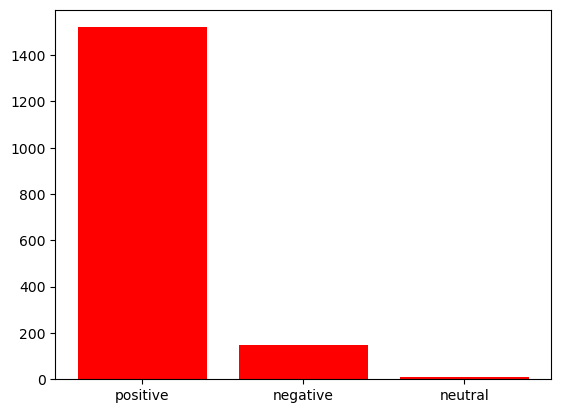

In [8]:
# bar chart showing total spread of sentiment
low_key = low_rate['Sentiment'].value_counts().keys().tolist()
low_val = low_rate['Sentiment'].value_counts().tolist()

fig = plt.bar(low_key, low_val, color='r')

([<matplotlib.patches.Wedge at 0x7fdc709820e0>,
 [Text(-1.0532842709306995, 0.31716280458147184, 'positive'),
  Text(1.0471191837105542, -0.3369590703710804, 'negative'),
  Text(1.0998045938029875, -0.020732955646648506, 'neutral')],
 [Text(-0.574518693234927, 0.17299789340807553, '90.69%'),
  Text(0.571155918387575, -0.18379585656604383, '8.71%'),
  Text(0.5998934148016295, -0.011308884898171912, '0.60%')])

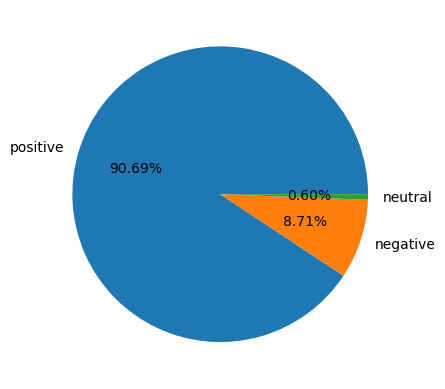

In [9]:
# normalize values to get %
norm_Lval = low_rate['Sentiment'].value_counts(normalize=True).tolist()
norm_Lvals = [i * 100 for i in norm_Lval]
for ind, i in enumerate(norm_Lvals):
    norm_Lvals[ind] = round(norm_Lvals[ind],2)
plt.pie(norm_Lvals, labels=low_key, autopct='%1.2f%%')

In [10]:
high_rate = yelp_df[(yelp_df['stars'] == 4) | (yelp_df['stars'] == 5)]
high_rate

,stars,text,Sentiment,neg_score,neu_score,pos_score,compound_score
0,5,wife took birthday breakfast excellent weathe...,positive,0.025,0.545,0.431,0.9935
1,5,idea people give bad reviews place goes show p...,positive,0.025,0.545,0.431,0.9935
2,4,love gyro plate rice good also dig candy selec...,positive,0.025,0.545,0.431,0.9935
3,5,rosie dakota love chaparral dog park convenien...,positive,0.025,0.545,0.431,0.9935
4,5,general manager scott petello good egg go deta...,positive,0.025,0.545,0.431,0.9935
...,...,...,...,...,...,...,...
9993,4,judging reviews maybe went good days ive enjoy...,positive,0.014,0.753,0.232,0.9860
9994,5,lets seewhat like surprise stadium well 950 ta...,positive,0.014,0.753,0.232,0.9860
9996,4,called house deliciousnessi could go item item...,positive,0.014,0.753,0.232,0.9860
9997,4,recently visited olive ivy business last week ...,positive,0.014,0.753,0.232,0.9860


**The bar chart below shows that the sentiment analysis predicted many reviews with 4-5 stars as 'Positive'; this suggests that the analysis predicted accurately.**

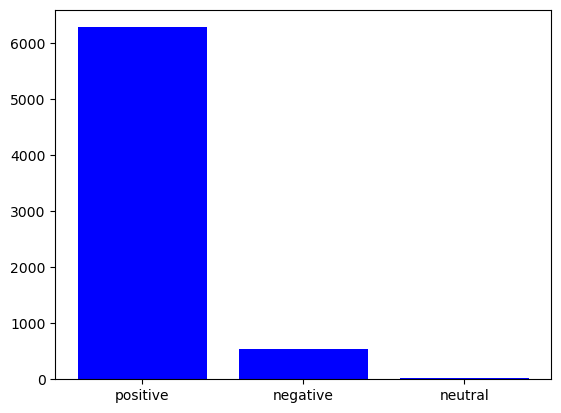

In [11]:
# bar chart showing total spread of sentiment
high_key = high_rate['Sentiment'].value_counts().keys().tolist()
high_val = high_rate['Sentiment'].value_counts().tolist()

fig = plt.bar(high_key, high_val, color='b')

([<matplotlib.patches.Wedge at 0x7fdc703e4280>,
 [Text(-1.0618296565217265, 0.2872590825908778, 'positive'),
  Text(1.057662710598868, -0.302240947935013, 'negative'),
  Text(1.0998900847855981, -0.01554996431924971, 'neutral')],
 [Text(-0.5791798126482143, 0.15668677232229694, '91.59%'),
  Text(0.5769069330539279, -0.16485869887364343, '7.96%'),
  Text(0.5999400462466898, -0.00848179871959075, '0.45%')])

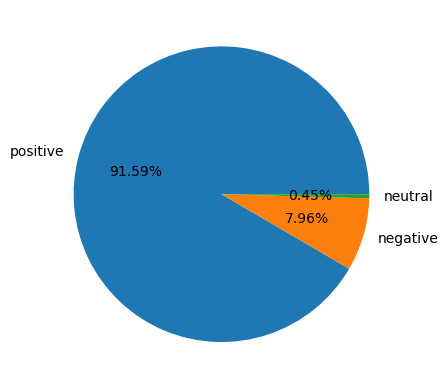

In [12]:
# normalize values to get %
norm_bval = high_rate['Sentiment'].value_counts(normalize=True).tolist()
norm_bvals = [i * 100 for i in norm_bval]
for ind, i in enumerate(norm_bvals):
    norm_bvals[ind] = round(norm_bvals[ind],2)
plt.pie(norm_bvals, labels=high_key, autopct='%1.2f%%')

In [13]:
neutral = yelp_df[(yelp_df['stars'] == 3)]
neutral

,stars,text,Sentiment,neg_score,neu_score,pos_score,compound_score
16,3,went saturday afternoon place incredibly empty...,positive,0.025,0.545,0.431,0.9935
18,3,met friend lunch yesterday loved water feature...,positive,0.025,0.545,0.431,0.9935
20,3,dvapyou go least life really neat place alot h...,positive,0.025,0.545,0.431,0.9935
34,3,theres two ways look place one getting quality...,positive,0.025,0.545,0.431,0.9935
45,3,everything nice ice cream delicious overwhelmi...,positive,0.025,0.545,0.431,0.9935
...,...,...,...,...,...,...,...
9967,3,thought reviewed location already weird one ...,positive,0.014,0.753,0.232,0.9860
9968,3,never didnt know expect every time heard name...,positive,0.014,0.753,0.232,0.9860
9976,3,looking chile rellenos place great job making ...,positive,0.014,0.753,0.232,0.9860
9983,3,35 stars decided check place waves space decor...,positive,0.014,0.753,0.232,0.9860


**The bar chart below shows that the sentiment analysis predicted many reviews with 3 stars as 'Positive'; this suggests that the analysis predicted incorrectly.**

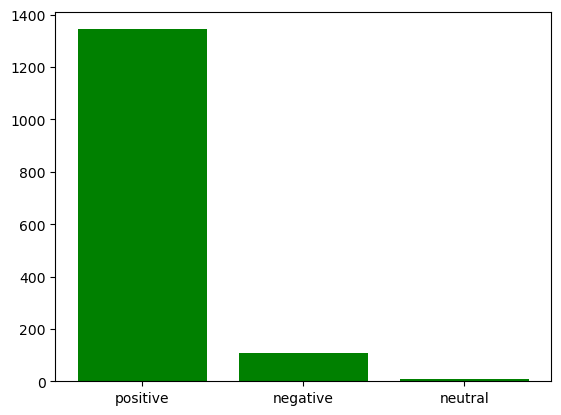

In [14]:
# bar chart showing total spread of sentiment
neu_key = neutral['Sentiment'].value_counts().keys().tolist()
neu_val = neutral['Sentiment'].value_counts().tolist()

fig = plt.bar(neu_key, neu_val, color='g')

([<matplotlib.patches.Wedge at 0x7fdc708ee380>,
 [Text(-1.0653554836920596, 0.2738935803688318, 'positive'),
  Text(1.0598188707111915, -0.29459117652172584, 'negative'),
  Text(1.099791343346018, -0.02142431098451982, 'neutral')],
 [Text(-0.5811029911047597, 0.14939649838299915, '91.99%'),
  Text(0.5780830203879226, -0.1606860962845777, '7.39%'),
  Text(0.599886187279646, -0.01168598780973808, '0.62%')])

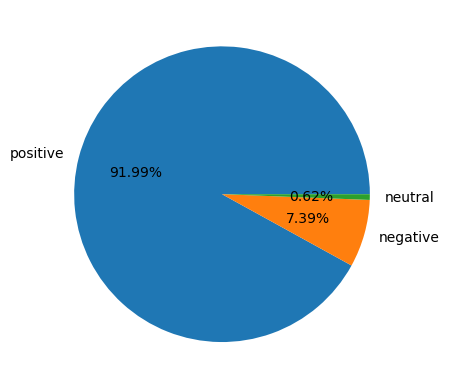

In [15]:
# normalize values to get %
norm_nval = neutral['Sentiment'].value_counts(normalize=True).tolist()
norm_nvals = [i * 100 for i in norm_nval]
for ind, i in enumerate(norm_nvals):
    norm_nvals[ind] = round(norm_nvals[ind],2)
plt.pie(norm_nvals, labels=neu_key, autopct='%1.2f%%')

## Part-2
   In this part of the project, we're using the sentiment analysis of the user review to predict the ratings or stars they would give based on the review. We're using a train_test_split function provided by the scikit library to split the dataset into training and testing sets. We train our machine learning model with the training datasets and predict the result of the test dataset using the model.  

### Displaying the percentage distribution of stars in the dataset

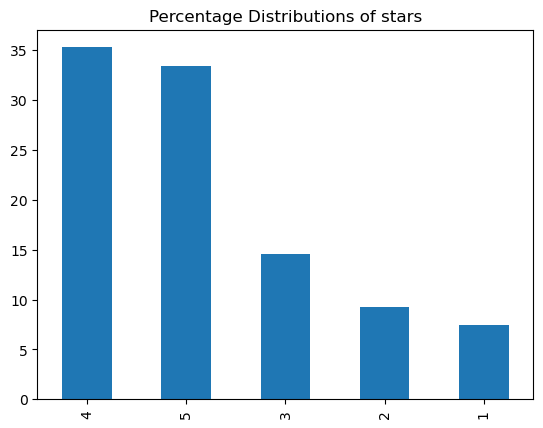

In [16]:
import matplotlib.pyplot as plt
round(yelp_df.stars.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions of stars')
plt.show()

- As seen above our dataset contains a large number of 4 and 5 stars ratings.

## train_test_split
- we split the data into training and testing sets using train_test_split function

In [17]:
from sklearn.model_selection import train_test_split

independent_var = yelp_df.text
dependent_var = yelp_df.stars

IV_train, IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size = 0.1, random_state = 225)

print('Total number of train and test data')
print('independent_train :', len(IV_train))
print('independent_test  :', len(IV_test))
print('dependent_train :', len(DV_train))
print('dependent_test  :', len(DV_test))

Total number of train and test data
independent_train : 9000
independent_test  : 1000
dependent_train : 9000
dependent_test  : 1000


### Functions we used to predict the star ratings ###
- We usedTfidfVectorizer class in the scikit-learn library to convert a collection of text reviews into a matrix of TF-IDF features. 
- We used logistic regression, a machine learning algorithm, to classify our reviews by training the model with the training dataset and predicting the outcome of the test datasets. 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs", max_iter=1000)


- We use Pipeline to preprocess, classify, and model our dataset

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)
predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 31,  14,   2,   3,   0],
       [ 11,  15,   7,   3,   3],
       [ 10,  18,  31,  14,   1],
       [ 15,  27,  77, 221, 101],
       [  7,  13,  25, 128, 223]])

- The below model predicts the stars that the user would give based on the review

In [20]:
# example = ["Extra bed was the worst breakfast queue was really terrible"]
# example =["excellent service, everything was perfect"]
# example =["Worst service, I'm unhappy"]
example =["The place was alright but it could've been better", "Extra bed was the worst breakfast queue was really terrible", "excellent service, everything was perfect", "Worst service, I'm unhappy"]
result = model.predict(example)

print(f'The model predicted the following stars: {result}')

The model predicted the following stars: [3 2 5 1]


- Below is the accuracy, precision, and recall score of our model.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.521
Precision :  0.5771786719910306
Recall :  0.521


**Our model's accuracy isn't very high, as it hasn't been trained with enough data. In our datasets, the percentage of neutral and negative reviews is significantly less than positive; hence, our model prediction isn't accurate due to the unequal distribution of the reviews.**

### Conclusion ### 
Overall, we have learned a lot from our experiences in this project. In the first part of this project, we noticed that the pretrained model from nltk categorized a lot of reviews as positive. Which means there are a lot of false positives in our data. From our observations, even if we had an equal amount of data based off the stars from the reviews, we still believed that there will be a lot of incorrect classifications. We ultimately decided that the sentiment analysis model from nltk is not very accurate when it comes to yelp reviews. We would like to note that, in reviews that had a 4 or 5 star rating, the sentiment analyzer classified most of them correctly. Which makes us believe that the model has been trained with a lot of positive sentences rather than neutral or negative sentences.

In the second part of this project, we wanted to see if we can use our sentiment analysis from the first part of the project to be able to determine the star rating it would recommend us to give. By the experimentation we had above, we noticed that our accuracy was not as high as expected. We believe that this was caused by our sentiment analysis dataset. This part on the other hand, we think if we had an equal amount of data based of the star ratings, we would have a much more accurate prediction since it would have enough to fairly train our model.